<h1> <center> Project: Analyzing Hospital Readmissions in Diabetes Patients </center> </h1>




### Introduction

Hospital Readmissions related to chronic conditions such as Diabetes are large in volume, they're high-cost, and in many cases, potentially preventable events. Readmissions are increasingly being used as a quality measure to improve discharge processes at hospitals, as well as brings attention to the complexity of care required by patients having a chronic condition and co-morbidities.
<br> <br>
This is a personal project by Shambhavi Kumar to take a data-driven approach in identifying risk factors leading to readmissions for Diabetes patients. While the project is work-in-progress, this script covers the data wrangling and preparation process for later stages of model-building.

<hr />

### Datasets

<ol> 
<li> dataset_diabetes.csv </li>
<a href="https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#">Source: UCI Machine Learning Repository</a>
<p>
This is the main dataset used for the analysis. Please see below for dataset description as provided in this link: 
<i><ul>
<li> The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.</li>
<ul>
<li> It is an inpatient encounter (a hospital admission). </li>
<li> It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis. </li>
<li> The length of stay was at least 1 day and at most 14 days. </li>
<li> Laboratory tests were performed during the encounter.</li>
<li> Medications were administered during the encounter. </li>
<li> The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc. </li>
</ul>
</ul></i>
</p>

<li> IDs_mapping.csv </li>
<a href="https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#">Source: UCI Machine Learning Repository</a>   
<p>
An additional file, ID_Mapping, was included by the source to map categorical IDs to names (Columns *Admission Source, Admission Type and Discharge Disposition*). This ID_Mapping file was then split by me into separate CSV files and saved as the following: <br>
<ul>
<li> AdmissionSources.csv </li>
<li> AdmissionTypes.csv </li>
<li> DischargeDisposition.csv </li>
</ul>
</p>    
    
<li> MedicationTypes.csv </li>
<a href="https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/diagnosis-treatment/drc-20351199">Source: Mayo Clinic - Diseases & Conditions </a> <br>
<a href="https://www.webmd.com/drugs/2/index">Source: WebMD - Drugs </a>
<p> 
This file was aggregated using the above resources to identify drug classes for the 24 medication columns provided in the main dataset. 
</p> <br>

<li> icd9.csv </li>
<a href="https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/codes.html">Source: CMS - Coding</a>
<p>
The main dataset has three columns with ICD-9 diagnosis codes associated with the event (Columns *diag_1, diag_2 and diag_3*). A file mapping these codes to their description was downloaded from the CMS website. 
</p>
</ol>

<hr />

### Process Flow 

This document covers data manipulation on the main dataset, which has been divided into three parts.
<p>
<ol>
<li> Part I: Data Import & Set-up </li>
<li> Part II: Data Exploration & Manipulation </li>
<li> Part III: Derived Columns </li>
</ol>
<hr />

In [191]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline

In [192]:
!pwd

/Users/shambhavikumar/Documents/Projects


In [193]:
# Import all relevant files 

df_base = pd.read_csv('Diabetes_HospitalReadmissions/dataset_diabetes/diabetic_data.csv')
admission_sources = pd.read_csv('Diabetes_HospitalReadmissions/dataset_diabetes/AdmissionSources.csv')
admission_types = pd.read_csv('Diabetes_HospitalReadmissions/dataset_diabetes/AdmissionTypes.csv')
discharge_disposition = pd.read_csv('Diabetes_HospitalReadmissions/dataset_diabetes/DischargeDispositions.csv')
df_medication = pd.read_csv('Diabetes_HospitalReadmissions/dataset_diabetes/MedicationTypes.csv')


In [194]:
icd = pd.read_csv('Diabetes_HospitalReadmissions/dataset_diabetes/icd9.csv')

icd.head()

,DIAGNOSIS CODE,LONG DESCRIPTION,SHORT DESCRIPTION,Unnamed: 3
0,0010,Cholera due to vibrio cholerae,Cholera d/t vib cholerae,NaN
1,0011,Cholera due to vibrio cholerae el tor,Cholera d/t vib el tor,NaN
2,0019,"Cholera, unspecified",Cholera NOS,NaN
3,0020,Typhoid fever,Typhoid fever,NaN
4,0021,Paratyphoid fever A,Paratyphoid fever a,NaN


### <font color='darkblue'> Part I: Data Import & Set-up </font>

In [228]:
pd.set_option('display.max_columns', 100)

#Duplicate original dataframe df_base as df 
df = df_base

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [229]:
# Print summary of dataframe

print 'Dataframe Shape & Size: \n', df.shape, df.size 
print '\n' 
print 'Columns: \n', df.columns

Dataframe Shape & Size: 
(101766, 50) 5088300


Columns: 
Index([u'encounter_id', u'patient_nbr', u'race', u'gender', u'age', u'weight',
       u'admission_type_id', u'discharge_disposition_id',
       u'admission_source_id', u'time_in_hospital', u'payer_code',
       u'medical_specialty', u'num_lab_procedures', u'num_procedures',
       u'num_medications', u'number_outpatient', u'number_emergency',
       u'number_inpatient', u'diag_1', u'diag_2', u'diag_3',
       u'number_diagnoses', u'max_glu_serum', u'A1Cresult', u'metformin',
       u'repaglinide', u'nateglinide', u'chlorpropamide', u'glimepiride',
       u'acetohexamide', u'glipizide', u'glyburide', u'tolbutamide',
       u'pioglitazone', u'rosiglitazone', u'acarbose', u'miglitol',
       u'troglitazone', u'tolazamide', u'examide', u'citoglipton', u'insulin',
       u'glyburide-metformin', u'glipizide-metformin',
       u'glimepiride-pioglitazone', u'metformin-rosiglitazone',
       u'metformin-pioglitazone', u'change', u'diabet

In [197]:
# As mentioned earlier, df_medication is a file I've created to map each medication to its drug class, description and side-effects.
# This allows me to have a high-level view of the medications prescribed and used

df_medication.head()

,﻿MedicationName,MedicationClass,MedicationTypeDescription,SideEffects_Possible
0,acarbose,Alpha-glucosidase Inhibitors,NaN,NaN
1,acetohexamide,Sulfonylureas,These medications help your body secrete more ...,Possible side effects include low blood sugar ...
2,chlorpropamide,Sulfonylureas,These medications help your body secrete more ...,Possible side effects include low blood sugar ...
3,citoglipton,Dipeptidyl peptidase-4 Inhibitors,NaN,NaN
4,examide,Diuretics,NaN,NaN


In [230]:
# Find columns in dataset that are categorical in nature, and print unique values in those columns 
# Limit columns to those having fewer than 30 unique values
# This would avoid printing values in columns such as Encounter_ID, Patient_Number, ICD Codes, etc. 

for col in df:
    if df[col].nunique() < 30:
        print col, df[col].unique()

race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id [6 1 2 3 4 5 8 7]
discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28 19
 27]
admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
num_procedures [0 5 1 6 2 3 4]
number_inpatient [ 0  1  2  3  6  5  4  7  8  9 15 10 11 14 12 13 17 16 21 18 19]
number_diagnoses [ 1  9  6  7  5  8  3  4  2 16 12 13 15 10 11 14]
max_glu_serum ['None' '>300' 'Norm' '>200']
A1Cresult ['None' '>7' '>8' 'Norm']
metformin ['No' 'Steady' 'Up' 'Dow

### <font color='darkblue'> Part II: Data Exploration & Manipulation </font> 

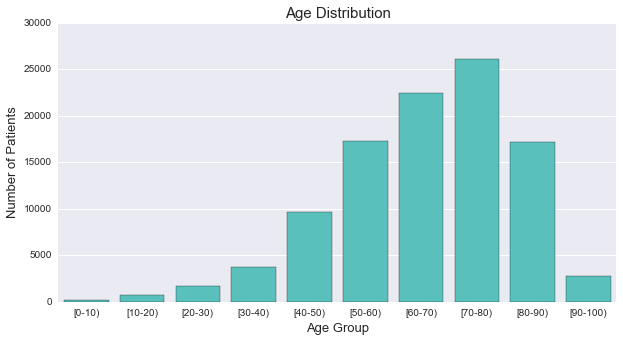

In [231]:
# Create visualization on age distribution

age_dist  = df['age'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=age_dist.index, y=age_dist.values, color='mediumturquoise') 

plt.title('Age Distribution',fontsize=15)
plt.ylabel('Number of Patients', fontsize=13)
plt.xlabel('Age Group', fontsize=13)
plt.show()

In [266]:
# We observe that a large majority of weight readings are missing from the dataset 
# We don't want to employ the usual method of replacing missing values with an average across all members
# Hence, we will not use this feature as a predictor

df['weight'] = df['weight'].replace('NaN', np.nan) 
df['weight'].value_counts(dropna=False)

NaN          98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
dtype: int64

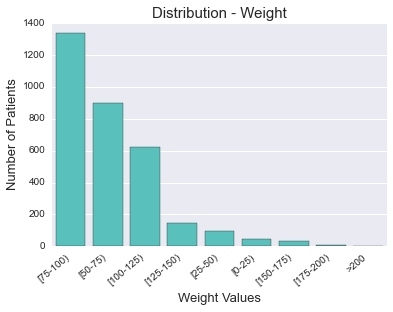

In [267]:
# Plot weight distribution across members 

ax = sns.barplot(x=df['weight'].value_counts(dropna=False).index, y=df['weight'].value_counts(dropna=False).values, color='mediumturquoise') 

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=40, ha="right")

plt.title('Distribution - Weight',fontsize=15)
plt.ylabel('Number of Patients', fontsize=13)
plt.xlabel('Weight Values', fontsize=13)
plt.show()

In [200]:
admission_sources.head()

,AdmissionSourceID,AdmissionSourceName
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)


In [232]:
# Join with tables to map ID to its description for Admission Source, Admission Types and Discharge Disposition

df = pd.merge(df, admission_sources, left_on = 'admission_source_id', right_on = 'AdmissionSourceID', how='left')
df = pd.merge(df, admission_types, left_on = 'admission_type_id', right_on = 'AdmissionTypeID', how='left')
df = pd.merge(df, discharge_disposition, left_on = 'discharge_disposition_id', right_on = 'DischargeDispositionID', how='left')

In [233]:
df[['encounter_id','admission_type_id','AdmissionTypeName','discharge_disposition_id','DischargeDispositionName','admission_source_id','AdmissionSourceName']].head()

,encounter_id,admission_type_id,AdmissionTypeName,discharge_disposition_id,DischargeDispositionName,admission_source_id,AdmissionSourceName
0,2278392,6,NaN,25,Not Mapped,1,Physician Referral
1,149190,1,Emergency,1,Discharged to home,7,Emergency Room
2,64410,1,Emergency,1,Discharged to home,7,Emergency Room
3,500364,1,Emergency,1,Discharged to home,7,Emergency Room
4,16680,1,Emergency,1,Discharged to home,7,Emergency Room


In [234]:
# Drop duplicate columns that have been added to the right of the dataframe due to merging

df = df.drop(['AdmissionSourceID','AdmissionTypeID','DischargeDispositionID'], axis=1);

In [235]:
admission_source_dist = df['AdmissionSourceName'].value_counts().sort_index()
discharge_disposition_dist = df['DischargeDispositionName'].value_counts().sort_index()
admission_type_dist = df['AdmissionTypeName'].value_counts().sort_index()

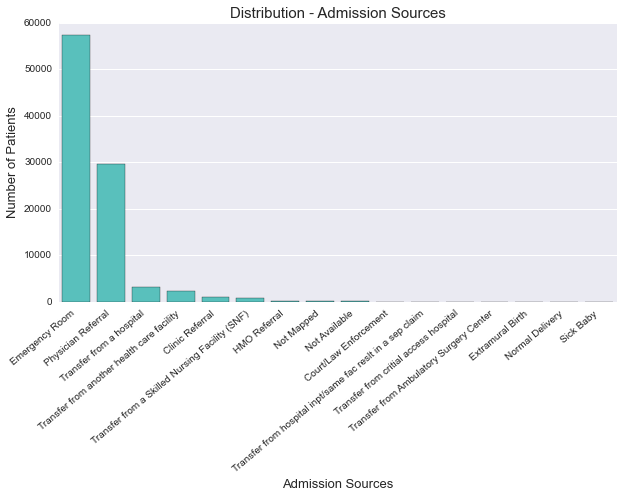

In [236]:
# Plot distribution of Admission Sources 
# Order by frequency of occurence

plt.figure(figsize=(10,5))
ax = sns.barplot(x=admission_source_dist.index, y=admission_source_dist.values, color='mediumturquoise',
                 order = df['AdmissionSourceName'].value_counts().index) 

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=40, ha="right")

plt.title('Distribution - Admission Sources',fontsize=15)
plt.ylabel('Number of Patients', fontsize=13)
plt.xlabel('Admission Sources', fontsize=13)
plt.show()

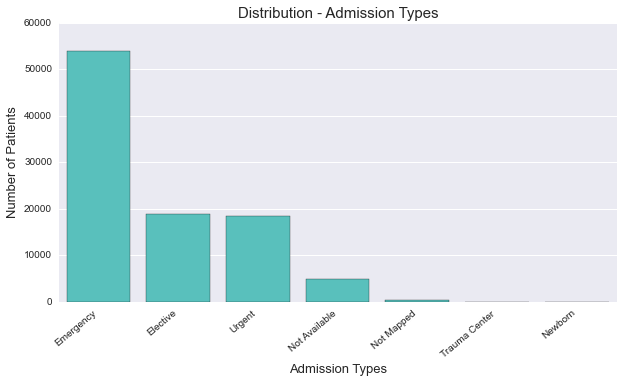

In [237]:
# Plot distribution of Admission Types
# Order by frequency of occurence

plt.figure(figsize=(10,5))
ax = sns.barplot(x=admission_type_dist.index, y=admission_type_dist.values, color='mediumturquoise',
                 order = df['AdmissionTypeName'].value_counts().index) 

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=40, ha="right")

plt.title('Distribution - Admission Types',fontsize=15)
plt.ylabel('Number of Patients', fontsize=13)
plt.xlabel('Admission Types', fontsize=13)
plt.show()

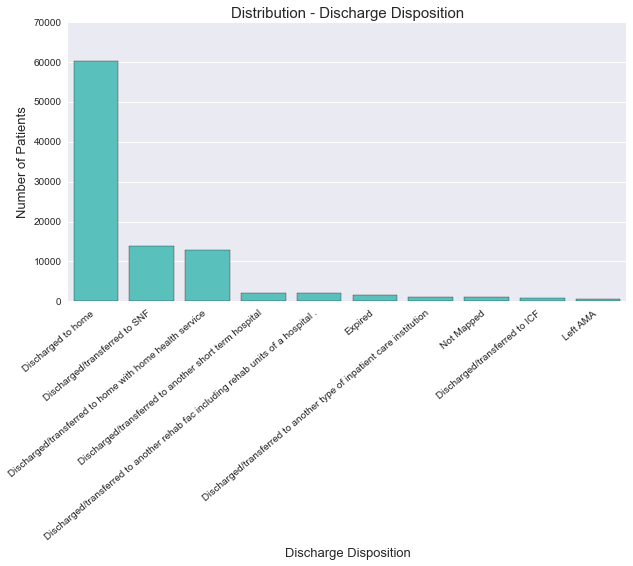

In [238]:
# Plot distribution of Discharge Disposition

# Since there are many distinct Discharge Disposition types, show only top 10 categories

plt.figure(figsize=(10,5))
ax = sns.barplot(x=discharge_disposition_dist.index, y=discharge_disposition_dist.values, color='mediumturquoise',
                 order = df['DischargeDispositionName'].value_counts().iloc[:10].index) 


labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=40, ha="right")

plt.title('Distribution - Discharge Disposition',fontsize=15)
plt.ylabel('Number of Patients', fontsize=13)
plt.xlabel('Discharge Disposition', fontsize=13)
plt.show()

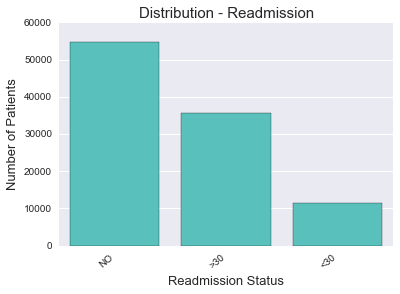

In [239]:
# Plot distribution of dependent variable, i.e. hospital readmission (Column 'readmitted')
# Since this is an imbalanced dataset, we need to amplify occurrence of readmission for training the model
# For this purpose, we may use an oversampling technique such as SMOTE during analysis

ax = sns.barplot(x=df['readmitted'].value_counts().index, y=df['readmitted'].value_counts().values, color='mediumturquoise') 

labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=40, ha="right")

plt.title('Distribution - Readmission',fontsize=15)
plt.ylabel('Number of Patients', fontsize=13)
plt.xlabel('Readmission Status', fontsize=13)
plt.show()

In [240]:
# Missing values in the main dataset are marked with '?' 
# We replace these '?' values with NULL / NaN instead
# Additionally, the table with ICD-9 codes imported from CMS does not use decimal points
# We remove the decimals from the diagnosis codes in the main dataset as well 

df = df.replace('?', np.nan) 
df['diag_1'] = df['diag_1'].str.replace('.','')
df['diag_2'] = df['diag_2'].str.replace('.','')
df['diag_3'] = df['diag_3'].str.replace('.','')

In [241]:
# Left join the main dataset to icd.csv 
# To map diagnosis columns in main dataset and obtain their ICD-9 descriptions

df = pd.merge(df, icd[['DIAGNOSIS CODE','SHORT DESCRIPTION']], left_on = 'diag_1', right_on = 'DIAGNOSIS CODE',how='left') 
df.rename(columns={'SHORT DESCRIPTION': 'diagdescription_1'}, inplace=True)
df = df.drop(['DIAGNOSIS CODE'], axis=1);

In [242]:
df = pd.merge(df, icd[['DIAGNOSIS CODE','SHORT DESCRIPTION']], left_on = 'diag_2', right_on = 'DIAGNOSIS CODE',how='left')  
df.rename(columns={'SHORT DESCRIPTION': 'diagdescription_2'}, inplace=True)
df = df.drop(['DIAGNOSIS CODE'], axis=1);

In [243]:
df = pd.merge(df, icd[['DIAGNOSIS CODE','SHORT DESCRIPTION']], left_on = 'diag_3', right_on = 'DIAGNOSIS CODE', how='left')  
df.rename(columns={'SHORT DESCRIPTION': 'diagdescription_2'}, inplace=True)
df = df.drop(['DIAGNOSIS CODE'], axis=1);

In [244]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AdmissionSourceName,AdmissionTypeName,DischargeDispositionName,diagdescription_1,diagdescription_2,diagdescription_2
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,25083,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Physician Referral,NaN,Not Mapped,DMI oth uncntrld,NaN,NaN
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,25001,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home,NaN,DMI wo cmp nt st uncntrl,NaN
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home,NaN,NaN,NaN
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,25043,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home,NaN,DMI renal uncntrld,NaN
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home,NaN,NaN,NaN


In [247]:
# We observe that some codes aren't being mapped, as the the main dataset has some ICD-9 range instead of full codes
# For this purpose, we will implement a string match in the left join

### <font color='darkblue'> Part III: Derived Columns </font>

In [248]:
# Convert 'diabetesMed' column to binary values

df.diabetesMed = df.diabetesMed.map(dict(Yes=1, No=0))
df.diabetesMed.unique()

array([0, 1])

In [249]:
# Classify medications by Drug Class
# From my research on Diabetes, I studied that different medications may be prescribed to a patient.
# To create better predictors or features for this model, I've created three new columns with prevalent drug classes

In [250]:
# Medications under drug class of Sulfonylureas:
    # acetohexamide
    # chlorpropamide
    # glipizide
    # glimepiride
    # glyburide
    # tolazamide
    # tolbutamide

    
conditions = [
               (df['acetohexamide'] != 'No') 
             | (df['chlorpropamide'] != 'No')  
             | (df['glimepiride'] != 'No') 
             | (df['glipizide'] != 'No') 
             | (df['glyburide'] != 'No') 
             | (df['tolazamide'] != 'No') 
             | (df['tolbutamide'] != 'No') 
             ]  

    
choices = ['1']


df['Sulfonylureas'] = np.select(conditions, choices, default='0')


In [251]:
# Test if previous step is working correctly

df[['acetohexamide',
    'chlorpropamide',
    'glipizide',
    'glimepiride',
    'glyburide',
    'tolazamide',
    'tolbutamide',
    'Sulfonylureas']].head()

,acetohexamide,chlorpropamide,glipizide,glimepiride,glyburide,tolazamide,tolbutamide,Sulfonylureas
0,No,No,No,No,No,No,No,0
1,No,No,No,No,No,No,No,0
2,No,No,Steady,No,No,No,No,1
3,No,No,No,No,No,No,No,0
4,No,No,Steady,No,No,No,No,1


In [252]:
# Medications under drug class of Thiazolidinediones:
    # Pioglitazone
    # Rosiglitazone
    # troglitazone

conditions = [
               (df['pioglitazone'] != 'No') 
             | (df['rosiglitazone'] != 'No')  
             | (df['troglitazone'] != 'No') 
             ]  

    
choices = ['1']


df['Thiazolidinediones'] = np.select(conditions, choices, default='0')


In [253]:
# Medications under drug class of Alpha-glucosidase Inhibitors:
    # miglitol
    # acarbose

conditions = [
               (df['acarbose'] != 'No') 
             | (df['miglitol'] != 'No')  
             ]  

    
choices = ['1']


df['Alpha-Glucosidase Inhibitors'] = np.select(conditions, choices, default='0')

In [255]:
df.columns

Index([u'encounter_id', u'patient_nbr', u'race', u'gender', u'age', u'weight',
       u'admission_type_id', u'discharge_disposition_id',
       u'admission_source_id', u'time_in_hospital', u'payer_code',
       u'medical_specialty', u'num_lab_procedures', u'num_procedures',
       u'num_medications', u'number_outpatient', u'number_emergency',
       u'number_inpatient', u'diag_1', u'diag_2', u'diag_3',
       u'number_diagnoses', u'max_glu_serum', u'A1Cresult', u'metformin',
       u'repaglinide', u'nateglinide', u'chlorpropamide', u'glimepiride',
       u'acetohexamide', u'glipizide', u'glyburide', u'tolbutamide',
       u'pioglitazone', u'rosiglitazone', u'acarbose', u'miglitol',
       u'troglitazone', u'tolazamide', u'examide', u'citoglipton', u'insulin',
       u'glyburide-metformin', u'glipizide-metformin',
       u'glimepiride-pioglitazone', u'metformin-rosiglitazone',
       u'metformin-pioglitazone', u'change', u'diabetesMed', u'readmitted',
       u'AdmissionSourceName', u'Ad

In [258]:
# Create new dataframe as a checkpoint and store all relevant columns for analysis in the new dataframe
# Dataframe is now ready for further analysis and model-building
# Print dataframe to see final version

df_new = df
df_new.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,AdmissionSourceName,AdmissionTypeName,DischargeDispositionName,diagdescription_1,diagdescription_2,diagdescription_2,Sulfonylureas,Thiazolidinediones,Alpha-Glucosidase Inhibitors
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,25083,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,NO,Physician Referral,NaN,Not Mapped,DMI oth uncntrld,NaN,NaN,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,25001,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,1,>30,Emergency Room,Emergency,Discharged to home,NaN,DMI wo cmp nt st uncntrl,NaN,0,0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1,NO,Emergency Room,Emergency,Discharged to home,NaN,NaN,NaN,1,0,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,25043,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,1,NO,Emergency Room,Emergency,Discharged to home,NaN,DMI renal uncntrld,NaN,0,0,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,1,NO,Emergency Room,Emergency,Discharged to home,NaN,NaN,NaN,1,0,0


<hr />